In [32]:
import sys
print(sys.executable)


c:\Users\Daniela\miniconda3\envs\ProyectoParteIII_DS1_Riveros_env\python.exe


In [33]:
import sys

# Lista de paquetes mínimos
pkgs = ["pandas", "numpy", "matplotlib", "seaborn", "scikit-learn", "ipykernel"]

print("Instalando paquetes en:", sys.executable)
!{sys.executable} -m pip install --upgrade {' '.join(pkgs)}


Instalando paquetes en: c:\Users\Daniela\miniconda3\envs\ProyectoParteIII_DS1_Riveros_env\python.exe


In [34]:
import sys
print("Instalando scikit‑learn en:", sys.executable)
!{sys.executable} -m pip install --upgrade scikit-learn


Instalando scikit‑learn en: c:\Users\Daniela\miniconda3\envs\ProyectoParteIII_DS1_Riveros_env\python.exe


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

print("¡Todos los imports funcionan! pandas", pd.__version__, "| numpy", np.__version__)


¡Todos los imports funcionan! pandas 2.3.1 | numpy 2.2.6


# Proyecto DS1 – Exploración y Modelado de Datos

**Autor:** Riveros Lobos Rodolfo Gabriel  
**Fecha inicio:** <Fecha>

## Índice

1. [Introducción y Objetivo](#introduccion)  
2. [Abstract (250–500 palabras)](#abstract)  
3. [Preguntas e Hipótesis](#hipotesis)  

### Parte I – Exploración de Datos  
4. [Carga y Descripción del Dataset](#carga)  
5. [Análisis Exploratorio de Datos (EDA)](#eda)  
   5.1 [Valores faltantes](#nulos)  
   5.2 [Análisis univariado](#uni)  
   5.3 [Análisis bivariado](#bi)  
   5.4 [Análisis multivariado (≥ 3 variables)](#multi)  
6. [Conclusiones Parte I](#conclusiones1)  

### Parte II – Preprocesamiento y Modelado  
7. [Preprocesamiento de Datos](#prepro)  
   7.1 [Limpieza y tratamiento de nulos]  
   7.2 [Codificación y escalado]  
8. [Selección de Variables (Feature Selection)](#fs)  
9. [Entrenamiento del Modelo](#train)  
   9.1 [División Train/Test]  
   9.2 [Elección y ajuste de hiperparámetros]  
10. [Evaluación del Modelo](#eval)  
    10.1 [Métricas (accuracy, f1, MSE…)]  
    10.2 [Visualizaciones (matriz de confusión, ROC…)]  
11. [Conclusiones Generales](#conclusiones2)

---

<a id="introduccion"></a>


<a id="introduccion"></a>
# 1. Introducción y Objetivo

En el contexto de un proyecto de Data Science aplicado al comercio electrónico, este notebook utiliza un conjunto de datos transaccionales de una tienda en línea que registra cada pedido con atributos tales como el valor de la orden (`order_value`), el rango de descuento aplicado, la calificación de los reviews, la fecha de la compra, y variables demográficas y geográficas del cliente. El análisis inicial (Parte I) se enfoca en explorar la calidad y la distribución de estas variables, descubrir patrones univariados, bivariados y multivariados, y diagnosticar posibles problemas de datos como valores faltantes o outliers.

El objetivo general de este trabajo es construir un pipeline completo que no solo describa el comportamiento de las ventas y la satisfacción del cliente, sino que también permita **predecir dos aspectos clave**:  
- El **valor de la orden** (`order_value`) a partir de las características de la transacción y del cliente.  
- La probabilidad de que un cliente **solicite devolución** (`return_requested`) tras recibir su pedido.

Para ello, en la **Parte I** realizaremos la exploración y formulación de hipótesis; y en la **Parte III** (Proyecto Final) aplicaremos técnicas de preprocesamiento, selección de variables, entrenamiento supervisado y evaluación de métricas para validar nuestros modelos predictivos.


<a id="abstract"></a>
## 2. Abstract

Este notebook presenta un análisis integral de un dataset de comercio electrónico que reúne registros de pedidos realizados por clientes de una tienda en línea. El conjunto de datos incluye, para cada orden, atributos transaccionales (valor de la orden `order_value`, porcentaje de descuento aplicado), métricas de satisfacción (`review_score`), así como características demográficas y geográficas del cliente (edad, región, etc.) y un indicador binario de devolución solicitada (`return_requested`).  

En la **Parte I**, exploraremos la calidad y estructura de los datos: evaluaremos la presencia de valores faltantes, estudiaremos distribuciones univariadas para comprender rangos y sesgos, y construiremos análisis bivariados y multivariados para identificar patrones de relación entre variables clave (por ejemplo, cómo varía el valor de la orden según el descuento aplicado y la región del cliente). Nuestros resultados exploratorios nos permitirán formular preguntas precisas sobre el comportamiento de compra y los factores que influyen en la satisfacción del cliente y las devoluciones.

En la **Parte III** (Proyecto Final) desarrollaremos un pipeline de Machine Learning supervisado con dos objetivos principales: (i) predecir el **valor de la orden** (`order_value`) a partir de los atributos transaccionales y del cliente, y (ii) estimar la probabilidad de que un cliente **solicite devolución** (`return_requested`). Para ello aplicaremos técnicas de preprocesamiento (limpieza de nulos, codificación, escalado), seleccionaremos las variables más relevantes mediante métodos estadísticos y de árboles de decisión, y entrenaremos modelos de regresión y clasificación (por ejemplo, `RandomForestRegressor` y `RandomForestClassifier`). Finalmente, validaremos el desempeño con métricas adecuadas (MSE, R² para regresión; accuracy, precision, recall, F1 y matriz de confusión para clasificación) y extraeremos insights accionables.

Este trabajo busca demostrar un flujo completo de Data Science, desde la exploración inicial hasta la modelización y evaluación, generando conclusiones que puedan apoyar la toma de decisiones en estrategias de precios, descuentos y gestión de devoluciones.

---

<a id="hipotesis"></a>
## 3. Preguntas e Hipótesis

1. **¿Cómo afecta el porcentaje de descuento al valor promedio de la orden?**  
   - *Hipótesis:* A mayor descuento, el valor de la orden promedio aumenta hasta un punto de saturación.

2. **¿Existen diferencias regionales en el comportamiento de compra y en las devoluciones?**  
   - *Hipótesis:* Clientes de ciertas regiones presentan tasas de devolución significativamente mayores.

3. **¿La calificación de los reviews (`review_score`) se correlaciona con el porcentaje de descuento recibido?**  
   - *Hipótesis:* Descuentos muy elevados podrían asociarse con calificaciones más bajas si el producto no cumple expectativas.

4. **¿Es posible predecir con precisión el valor de la orden usando solo variables demográficas y el descuento?**  
   - *Hipótesis:* Un modelo de regresión con características transaccionales y demográficas logrará un R² ≥ 0.6.

5. **¿Qué factores (valor de la orden, descuento, región, calificación) son los más determinantes en la probabilidad de devolución?**  
   - *Hipótesis:* El valor de la orden y la calificación del review serán las variables más importantes para el modelo de clasificación de devoluciones.


<a id="carga"></a>
## 4. Carga y Descripción del Dataset

A continuación cargamos el dataset desde la carpeta `data/raw` y examinamos su estructura, tipos de datos y valores faltantes iniciales.


In [51]:
# 4.1 Importaciones y definición de ruta
import os


# Verifica el directorio de trabajo actual
print("Working directory:", os.getcwd())

# Construye la ruta al CSV (ajusta el nombre si es diferente)
csv_path = os.path.join("..", "data", "raw", "E-commerce Shopping Dataset.csv")
print("Ruta al dataset:", csv_path)

Working directory: c:\Users\Daniela\Documents\DATA SCIENCE\DATA SCIENTE 1\noteboks\data-science-proyecto\notebooks
Ruta al dataset: ..\data\raw\E-commerce Shopping Dataset.csv


In [52]:
import pandas as pd

# 1) Lectura del CSV
try:
    df = pd.read_csv(csv_path)
    print("✅ Dataset cargado correctamente. Shape:", df.shape)
except Exception as e:
    print("❌ Error al cargar el CSV:", e)


✅ Dataset cargado correctamente. Shape: (3000, 17)


###4.2. Descripción General
A continuación se describen brevemente las principales variables del dataset:

Estructura de las columnas:
Columna	Tipo de dato	Descripción
Unnamed: 0	int64	Índice original del archivo, puede ser eliminado.
order_id	object	Identificador único de la orden.
customer_id	object	Identificador del cliente.
order_date	object	Fecha de la compra (debería convertirse a datetime).
product_category	object	Categoría del producto.
product_price	float64	Precio unitario del producto.
quantity	int64	Cantidad de unidades compradas.
payment_method	object	Método de pago utilizado.
delivery_status	object	Estado de entrega del producto.
city	object	Ciudad del cliente.
state	object	Estado o provincia del cliente.
zipcode	int64	Código postal del cliente.
product_id	object	Identificador del producto.
discount_applied	float64	Porcentaje de descuento aplicado.
order_value	float64	Valor final de la orden (precio x cantidad - descuento).
review_rating	float64	Calificación otorgada por el cliente (1 a 5). Contiene 130 valores faltantes.
return_requested	bool	Indica si el cliente pidió devolución.

In [53]:
# Muestra las primeras 5 filas
df.head()
# Información de columnas, tipos y nulos
df.info()
# Estadísticas básicas de cada columna
df.describe(include="all").T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        3000 non-null   int64  
 1   order_id          3000 non-null   object 
 2   customer_id       3000 non-null   object 
 3   order_date        3000 non-null   object 
 4   product_category  3000 non-null   object 
 5   product_price     3000 non-null   float64
 6   quantity          3000 non-null   int64  
 7   payment_method    3000 non-null   object 
 8   delivery_status   3000 non-null   object 
 9   city              3000 non-null   object 
 10  state             3000 non-null   object 
 11  zipcode           3000 non-null   int64  
 12  product_id        3000 non-null   object 
 13  discount_applied  3000 non-null   float64
 14  order_value       3000 non-null   float64
 15  review_rating     2870 non-null   float64
 16  return_requested  3000 non-null   bool   


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,3000.0,NaN,NaN,NaN,1499.5,866.169729,0.0,749.75,1499.5,2249.25,2999.0
order_id,3000,3000,0934fe22-440c-4ed5-81a8-ccc35c33da30,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_id,3000,3000,d2529a19-caba-4aba-b98f-2acd02b8301b,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_date,3000,366,2024-09-30,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_category,3000,6,Sports,552,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_price,3000.0,NaN,NaN,NaN,254.598703,144.67033,5.04,132.7375,252.875,381.61,499.98
quantity,3000.0,NaN,NaN,NaN,2.466333,1.113229,1.0,1.0,2.0,3.0,4.0
payment_method,3000,5,Cash on Delivery,605,NaN,NaN,NaN,NaN,NaN,NaN,NaN
delivery_status,3000,4,Cancelled,761,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,3000,2706,East Jennifer,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### .Primer diagnóstico
A partir de esta descripción surgen algunos puntos importantes a revisar y trabajar:

Columnas bien tipadas:

Variables numéricas (product_price, quantity, order_value, discount_applied) están correctamente tipadas como float o int.

return_requested es booleana.

Casi todas las demás variables categóricas están como object, lo cual es esperable.

Mejoras necesarias:

Conversión de order_date: actualmente es un object, debería transformarse a datetime para análisis temporal.

Valores faltantes en review_rating: faltan 130 valores, lo que representa un 4.3% del total. Habrá que analizar si son aleatorios, y si conviene imputar, eliminar o segmentar el análisis.

Columna Unnamed: 0: parece ser un índice heredado del guardado en CSV. Posiblemente se puede eliminar.

In [54]:
# Eliminamos columna innecesaria
df.drop(columns=['Unnamed: 0'], inplace=True)

# Convertimos order_date a datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')


<a id="eda"></a>
## 5. Análisis Exploratorio de Datos (EDA) 
El análisis exploratorio de datos (EDA) es una fase crítica en todo proyecto de ciencia de datos. Su propósito es comprender la estructura, calidad y patrones subyacentes del dataset, guiando decisiones sobre limpieza, selección de variables, ingeniería de features y enfoques de modelado.

Durante esta etapa se buscan respuestas a preguntas como:

¿Hay valores atípicos, faltantes o inconsistencias?

¿Cómo se distribuyen las variables?

¿Qué relaciones existen entre ellas?

¿Qué patrones destacan según el perfil del consumidor o el comportamiento de compra?



<a id="nulos"></a>
## 5.1 Valores faltantes 
Antes de aplicar cualquier técnica de modelado o visualización avanzada, es crucial entender si nuestro dataset presenta valores faltantes. Los datos ausentes pueden afectar negativamente tanto el análisis descriptivo como los modelos predictivos si no se manejan adecuadamente.


In [41]:
# Cálculo de nulos por columna
missing = df.isnull().sum().to_frame("nulos")
missing["% nulos"] = missing["nulos"] / len(df) * 100
missing.sort_values("% nulos", ascending=False)



,nulos,% nulos
review_rating,130,4.333333
Unnamed: 0,0,0.000000
order_id,0,0.000000
order_date,0,0.000000
customer_id,0,0.000000
product_price,0,0.000000
quantity,0,0.000000
payment_method,0,0.000000
product_category,0,0.000000
delivery_status,0,0.000000


## 5.2 Análisis Univariado
Objetivo
Explorar la distribución individual de cada variable para:
Detectar outliers
Evaluar escalas y distribuciones
Comprender el comportamiento de variables clave

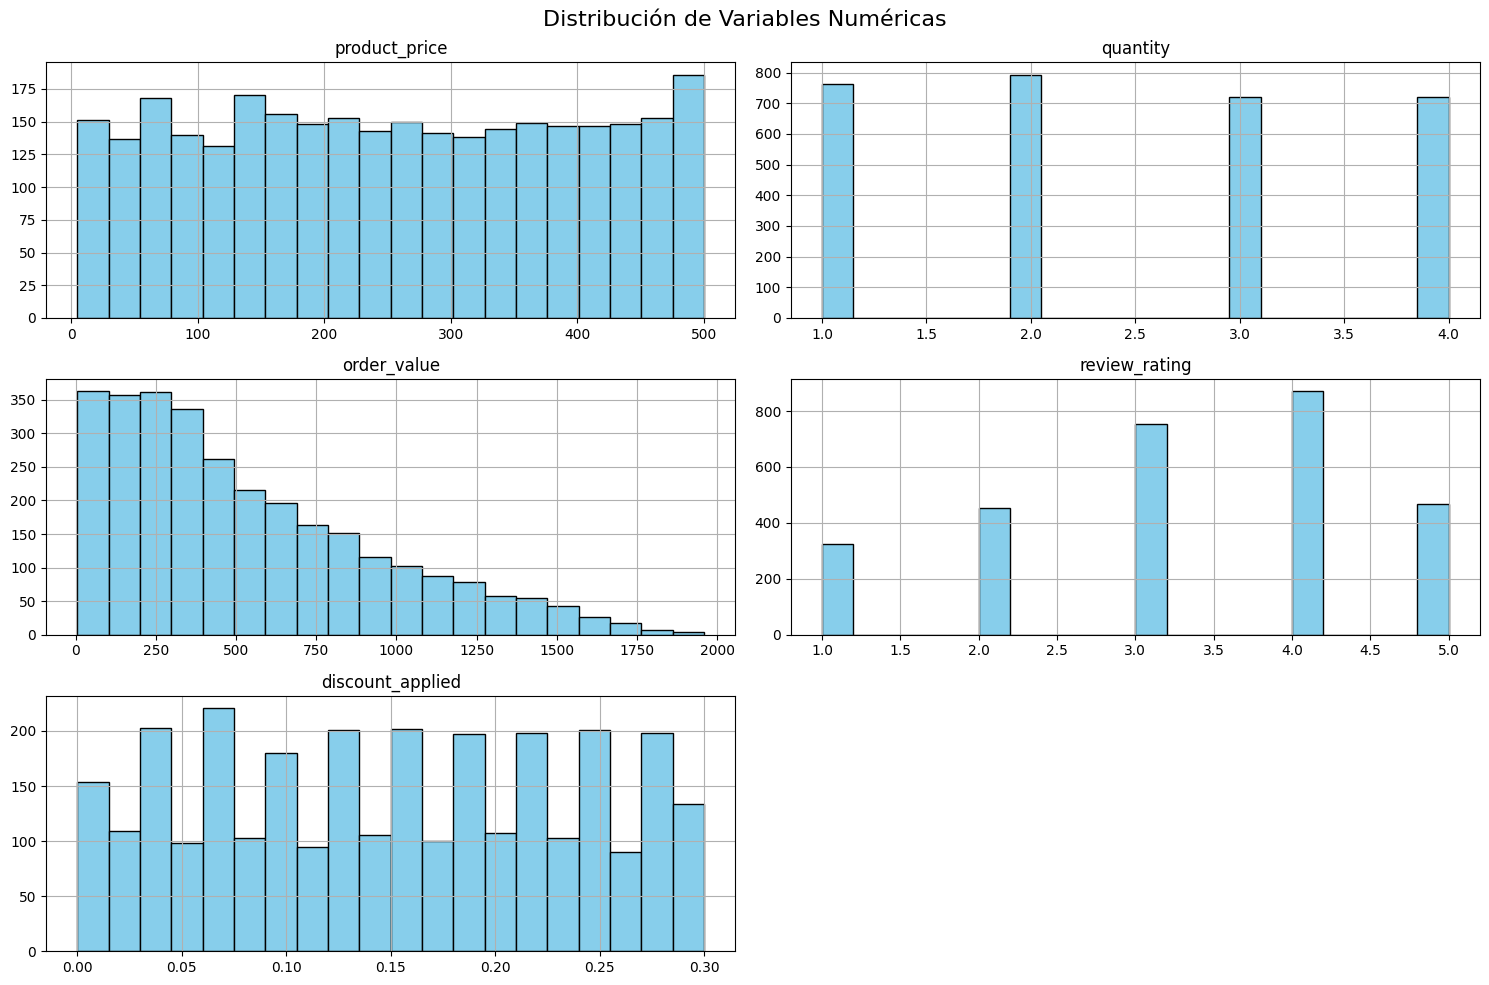

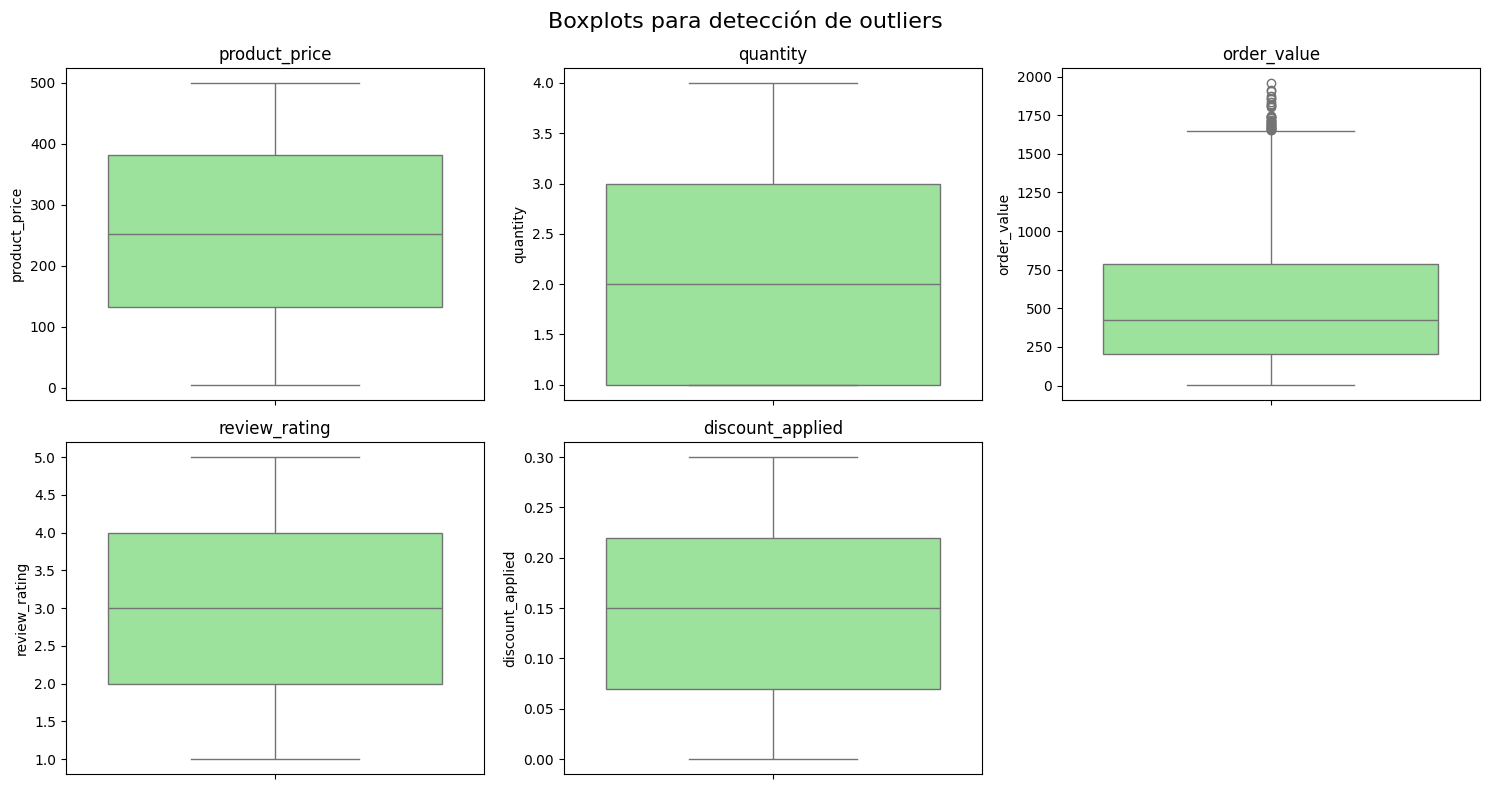

,count,mean,std,min,25%,50%,75%,max
product_price,3000.0,254.598703,144.670330,5.04,132.7375,252.875,381.610,499.98
quantity,3000.0,2.466333,1.113229,1.00,1.0000,2.000,3.000,4.00
order_value,3000.0,534.227277,412.232929,5.40,207.8600,422.125,784.595,1958.96
review_rating,2870.0,3.245993,1.226853,1.00,2.0000,3.000,4.000,5.00
discount_applied,3000.0,0.148023,0.086521,0.00,0.0700,0.150,0.220,0.30


In [55]:
# Subconjunto de columnas numéricas
num_cols = ['product_price', 'quantity', 'order_value', 'review_rating', 'discount_applied']

# Histogramas
df[num_cols].hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Distribución de Variables Numéricas', fontsize=16)
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, y=col, color='lightgreen')
    plt.title(col)
plt.suptitle("Boxplots para detección de outliers", fontsize=16)
plt.tight_layout()
plt.show()

# Estadísticos descriptivos
df[num_cols].describe().T


## 5.2.1 Conclusiones del Análisis Univariado de Variables Numéricas

Las variables numéricas product_price y order_value muestran una alta variabilidad, con rangos amplios y presencia de valores extremos que pueden considerarse atípicos. Esto es consistente con un comportamiento esperado en datos de comercio electrónico, donde se combinan productos de bajo y alto valor, así como pedidos de distintas magnitudes.

La variable quantity presenta valores discretos entre 1 y 4, con una tendencia a comprar pocas unidades por pedido, reflejando un patrón de consumo habitual.

El review_rating tiene una media cercana a 3.25 sobre 5, con alrededor del 4.3% de valores faltantes. Esta variable probablemente tenga una distribución centrada, aunque es necesario un tratamiento especial para los datos faltantes antes de avanzar en el análisis.

El porcentaje de descuento aplicado (discount_applied) se encuentra en un rango entre 0% y 30%, con un valor promedio cercano al 15%. Esto sugiere que los descuentos son frecuentes y podrían estar estructurados en niveles determinados.

En conjunto, estas características muestran un conjunto de datos coherente con la dinámica típica de una tienda en línea, con diversidad en precios y cantidades, y un comportamiento moderado en la calificación de productos. Sin embargo, es importante considerar los valores atípicos y los datos faltantes en etapas posteriores para asegurar la calidad del análisis y modelado.



--- Análisis de product_category ---
                  Frecuencia  Porcentaje (%)
product_category                            
Sports                   552           18.40
Home                     537           17.90
Clothing                 506           16.87
Beauty                   483           16.10
Books                    476           15.87
Electronics              446           14.87


C:\Users\Daniela\AppData\Local\Temp\ipykernel_18880\159838677.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_abs.index, y=freq_abs.values, palette='viridis')


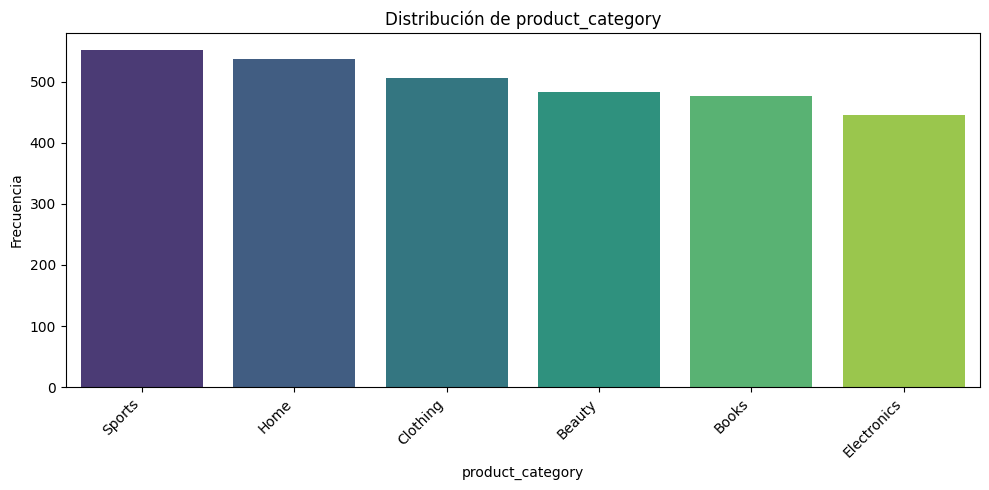


--- Análisis de payment_method ---
                  Frecuencia  Porcentaje (%)
payment_method                              
Cash on Delivery         605           20.17
Credit Card              603           20.10
Net Banking              603           20.10
Debit Card               603           20.10
PayPal                   586           19.53


C:\Users\Daniela\AppData\Local\Temp\ipykernel_18880\159838677.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_abs.index, y=freq_abs.values, palette='viridis')


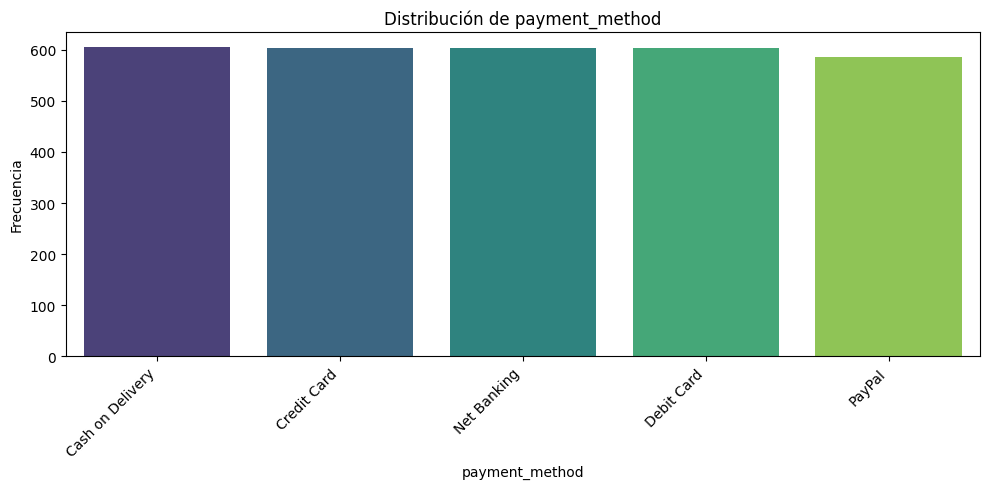


--- Análisis de delivery_status ---
                 Frecuencia  Porcentaje (%)
delivery_status                            
Cancelled               761           25.37
Returned                751           25.03
Delivered               749           24.97
Pending                 739           24.63


C:\Users\Daniela\AppData\Local\Temp\ipykernel_18880\159838677.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_abs.index, y=freq_abs.values, palette='viridis')


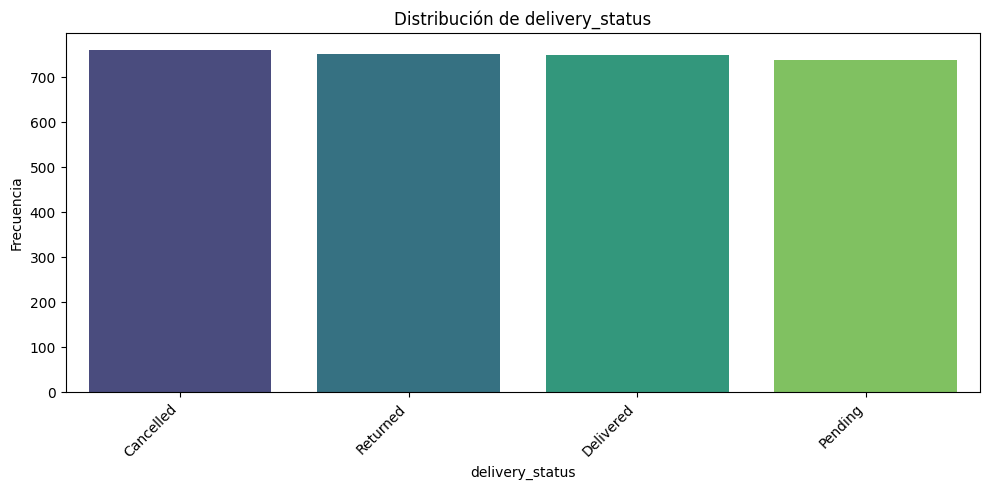


--- Análisis de city ---
                   Frecuencia  Porcentaje (%)
city                                         
East Jennifer               5            0.17
Johnsonmouth                5            0.17
West Michael                5            0.17
South David                 4            0.13
South Robert                4            0.13
...                       ...             ...
Lake Dawnfurt               1            0.03
Bradleymouth                1            0.03
Port Kristinburgh           1            0.03
Curryville                  1            0.03
West Nathanland             1            0.03

[2706 rows x 2 columns]


C:\Users\Daniela\AppData\Local\Temp\ipykernel_18880\159838677.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_abs.index, y=freq_abs.values, palette='viridis')


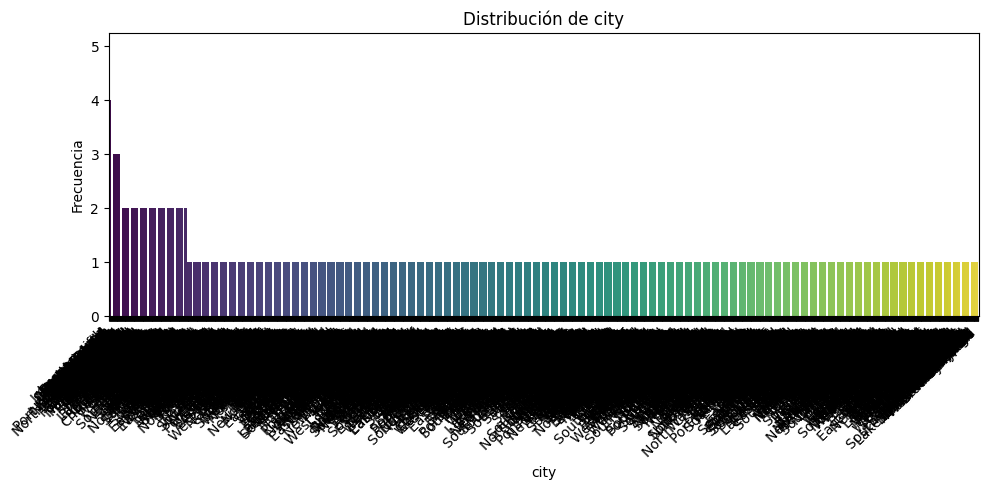


--- Análisis de state ---
                Frecuencia  Porcentaje (%)
state                                     
Oregon                  78            2.60
Mississippi             75            2.50
Montana                 74            2.47
Minnesota               72            2.40
Vermont                 71            2.37
Illinois                70            2.33
New Hampshire           70            2.33
Hawaii                  70            2.33
Massachusetts           70            2.33
Alaska                  70            2.33
Maine                   69            2.30
Arkansas                65            2.17
Connecticut             64            2.13
Utah                    64            2.13
Maryland                63            2.10
Kansas                  63            2.10
West Virginia           63            2.10
Wyoming                 62            2.07
Kentucky                62            2.07
Michigan                61            2.03
Alabama                 61 

C:\Users\Daniela\AppData\Local\Temp\ipykernel_18880\159838677.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_abs.index, y=freq_abs.values, palette='viridis')


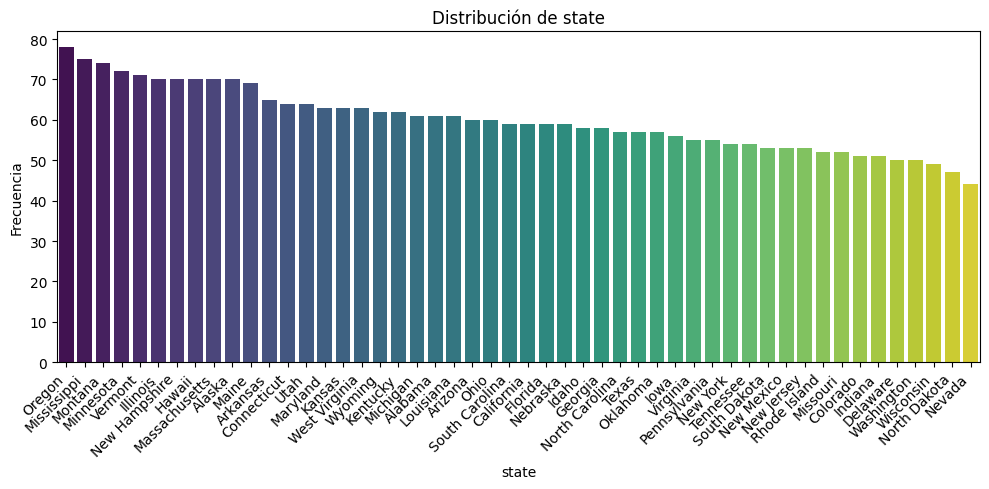

In [59]:
# Lista de variables categóricas clave
cat_vars = ['product_category', 'payment_method', 'delivery_status', 'city', 'state']

# Función para mostrar tablas de frecuencia y gráficos
def univariate_categorical_analysis(df, variables):
    for var in variables:
        print(f"\n--- Análisis de {var} ---")
        
        # Frecuencias absolutas y relativas
        freq_abs = df[var].value_counts()
        freq_rel = df[var].value_counts(normalize=True) * 100
        freq_df = pd.DataFrame({'Frecuencia': freq_abs, 'Porcentaje (%)': freq_rel.round(2)})
        print(freq_df)
        
        # Gráfico de barras
        plt.figure(figsize=(10, 5))
        sns.barplot(x=freq_abs.index, y=freq_abs.values, palette='viridis')
        plt.title(f'Distribución de {var}')
        plt.ylabel('Frecuencia')
        plt.xlabel(var)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

# Ejecutar función
univariate_categorical_analysis(df, cat_vars)


## 5.2.2 Conclusiones de Análisis Univariado — Variables Categóricas

Resumen de Distribuciones:

product_category:
Seis categorías principales con frecuencias bastante equilibradas (entre 14.87% y 18.40%). Esto indica una distribución relativamente pareja en la oferta/productos vendidos.

payment_method:
Cinco métodos de pago con frecuencias muy similares (~19.5% a 20.17%), lo que sugiere que no hay dominancia de un único medio.

delivery_status:
Cuatro estados distribuidos casi uniformemente, con una proporción cercana al 25% para cada uno. Destaca que un 25% fueron cancelados o devueltos, lo cual es relevante para análisis de devolución y satisfacción.

city:
Alta dispersión, con muchas ciudades con muy baja frecuencia (muchas con 1-5 ocurrencias, menos del 0.2% cada una). Esto complica análisis segmentados a nivel ciudad y sugiere considerar agrupaciones o focos por regiones.

state:
Estados con frecuencias relativamente equilibradas, con los principales representando entre 1.5% y 2.6% cada uno. Buen punto para análisis regional sin riesgo de sobreajuste en estados muy minoritarios.

## 5.3 Análisis Bivariado
El análisis bivariado nos permite estudiar relaciones entre dos variables. En tu caso, conviene enfocarnos en pares relevantes, por ejemplo:

discount_applied vs order_value: ¿Cómo afecta el descuento al valor de la orden?

review_rating vs discount_applied: ¿Los descuentos influyen en las valoraciones?

return_requested vs otras variables categóricas o numéricas: ¿Qué factores se asocian a devoluciones?

Variables geográficas (state) vs métricas clave (order_value, return_requested).

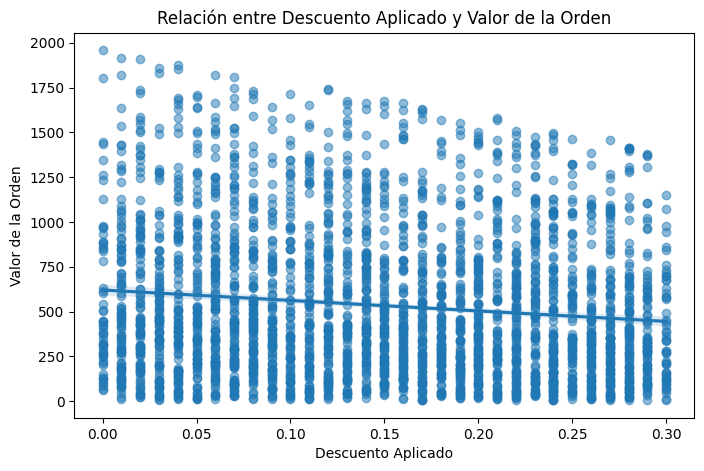

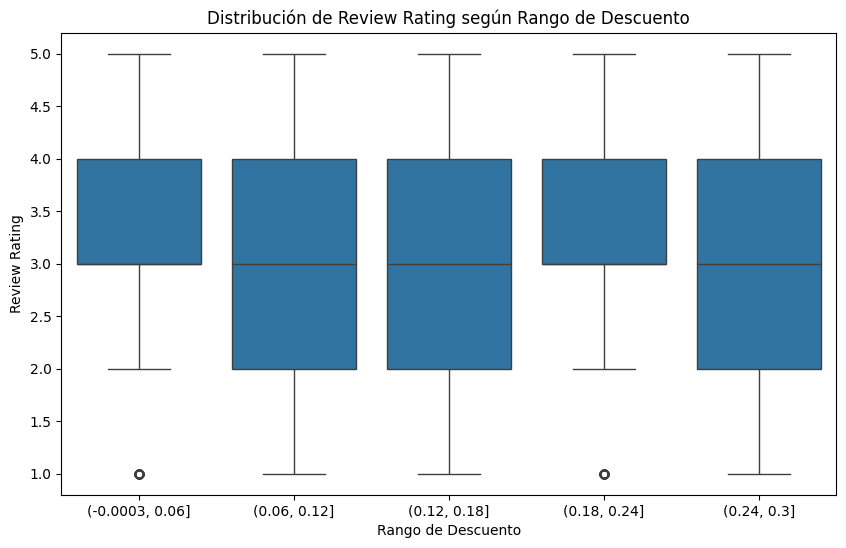

In [72]:
# Scatterplot con ajuste lineal: descuento aplicado vs valor de la orden
plt.figure(figsize=(8, 5))
sns.regplot(data=df, x='discount_applied', y='order_value', scatter_kws={'alpha':0.5})
plt.title('Relación entre Descuento Aplicado y Valor de la Orden')
plt.xlabel('Descuento Aplicado')
plt.ylabel('Valor de la Orden')
plt.show()

# Boxplot: revisión según rango de descuento
df['discount_bin'] = pd.cut(df['discount_applied'], bins=5)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='discount_bin', y='review_rating')
plt.title('Distribución de Review Rating según Rango de Descuento')
plt.xlabel('Rango de Descuento')
plt.ylabel('Review Rating')
plt.show()


return_requested     False     True 
state                               
Alabama           0.918033  0.081967
Alaska            0.900000  0.100000
Arizona           0.916667  0.083333
Arkansas          0.830769  0.169231
California        0.847458  0.152542
Colorado          0.960784  0.039216
Connecticut       0.843750  0.156250
Delaware          0.860000  0.140000
Florida           0.932203  0.067797
Georgia           0.827586  0.172414
Hawaii            0.785714  0.214286
Idaho             0.879310  0.120690
Illinois          0.871429  0.128571
Indiana           0.843137  0.156863
Iowa              0.875000  0.125000
Kansas            0.952381  0.047619
Kentucky          0.903226  0.096774
Louisiana         0.786885  0.213115
Maine             0.898551  0.101449
Maryland          0.888889  0.111111
Massachusetts     0.814286  0.185714
Michigan          0.836066  0.163934
Minnesota         0.888889  0.111111
Mississippi       0.813333  0.186667
Missouri          0.846154  0.153846
M

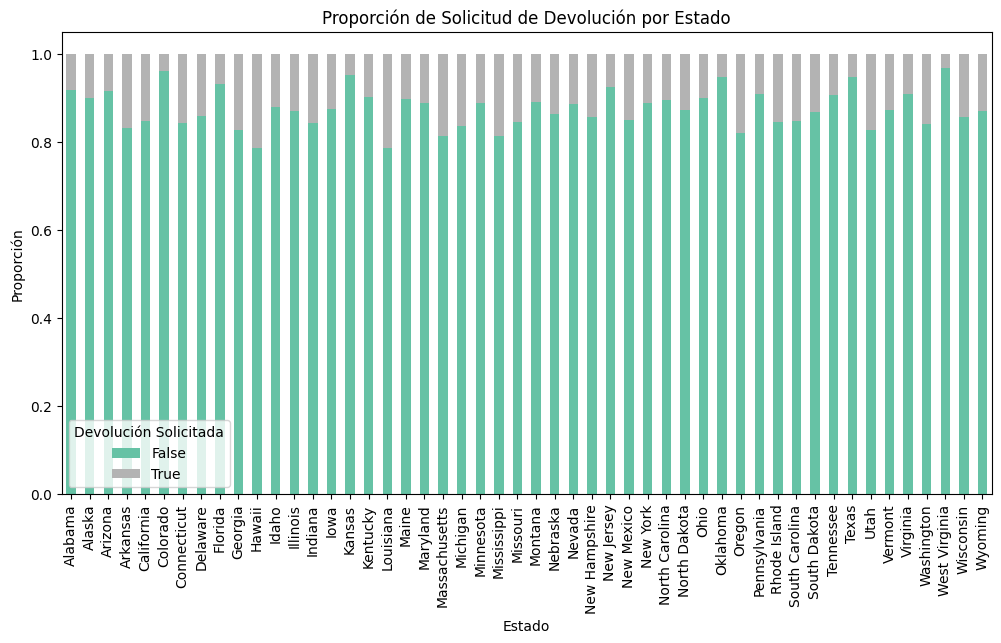

In [73]:
# Tabla de contingencia: estado vs devolución solicitada
contingency = pd.crosstab(df['state'], df['return_requested'], normalize='index')
print(contingency)

# Gráfico de barras apiladas
contingency.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title('Proporción de Solicitud de Devolución por Estado')
plt.xlabel('Estado')
plt.ylabel('Proporción')
plt.legend(title='Devolución Solicitada')
plt.show()
